#### Cai 2022 PBMC abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Cai 2022 PBMC data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230306**

### Load required modules

In [1]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import pybiomart as biomart
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [51]:
%matplotlib inline
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
annoy               NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
future              0.18.3
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsons

### Read datasets

In [3]:
adata = sc.read_h5ad('/Users/mairi.mcclean/example_data_lake/INBOX/raw/tb_cc/raw_data_objects/human/PBMC_PFMC/scrna/CaiY2022_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 223089 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [4]:
adata.var

gene_name
gene_id                       
ENSG00000223972.5      DDX11L1
ENSG00000227232.5       WASH7P
ENSG00000278267.1    MIR6859-1
ENSG00000243485.5  MIR1302-2HG
ENSG00000284332.1    MIR1302-2
...                        ...
ENSG00000198695.2       MT-ND6
ENSG00000210194.1        MT-TE
ENSG00000198727.2       MT-CYB
ENSG00000210195.2        MT-TT
ENSG00000210196.2        MT-TP

[61533 rows x 1 columns]

In [5]:
adata.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
...                                             ...        ...        ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   

                                             object       protocol  
barcode                                                             
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
...                                             ...            ...  
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  

[223089 rows x 10 columns]

### Subset object by protocol and tissue type

In [6]:
adata.obs['data_type'].value_counts()

data_type
scRNAseq    146168
scTCRseq     76921
Name: count, dtype: int64

In [7]:
adata_new = adata[adata.obs['data_type'].isin(['scRNAseq']),:]
adata_new

View of AnnData object with n_obs × n_vars = 146168 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [8]:
adata_new.obs['data_type'].value_counts()

data_type
scRNAseq    146168
Name: count, dtype: int64

In [9]:
adata_new.obs['tissue'].value_counts()

tissue
PBMC    77899
PFMC    68269
Name: count, dtype: int64

In [10]:
adata_new_2 = adata_new[adata_new.obs['tissue'].isin(['PBMC']),:]
adata_new_2

View of AnnData object with n_obs × n_vars = 77899 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [11]:
adata_new_2.obs['tissue'].value_counts()

tissue
PBMC    77899
Name: count, dtype: int64

### Make names unique

In [12]:
adata_new_2.var_names_make_unique()
sample_object = adata_new_2.copy()
sample_object

AnnData object with n_obs × n_vars = 77899 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

### Replace gene symbols 

In [13]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

gene_id
gene_name                     
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1

In [14]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [15]:
sample_object.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
...                                             ...        ...        ...   
TTTGTCAGTTGTGGCC-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   
TTTGTCATCAGCTCGG-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   
TTTGTCATCGAATGGG-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCAGTTGTGGCC-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   
TTTGTCATCAGCTCGG-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   
TTTGTCATCGAATGGG-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCAGTTGTGGCC-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCAGCTCGG-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCGAATGGG-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   

                                             object       protocol  
barcode                                                             
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
...                                             ...            ...  
TTTGTCAGTTGTGGCC-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq  
TTTGTCATCAGCTCGG-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq  
TTTGTCATCGAATGGG-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq  
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq  
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq  

[77899 rows x 10 columns]

### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:00)


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


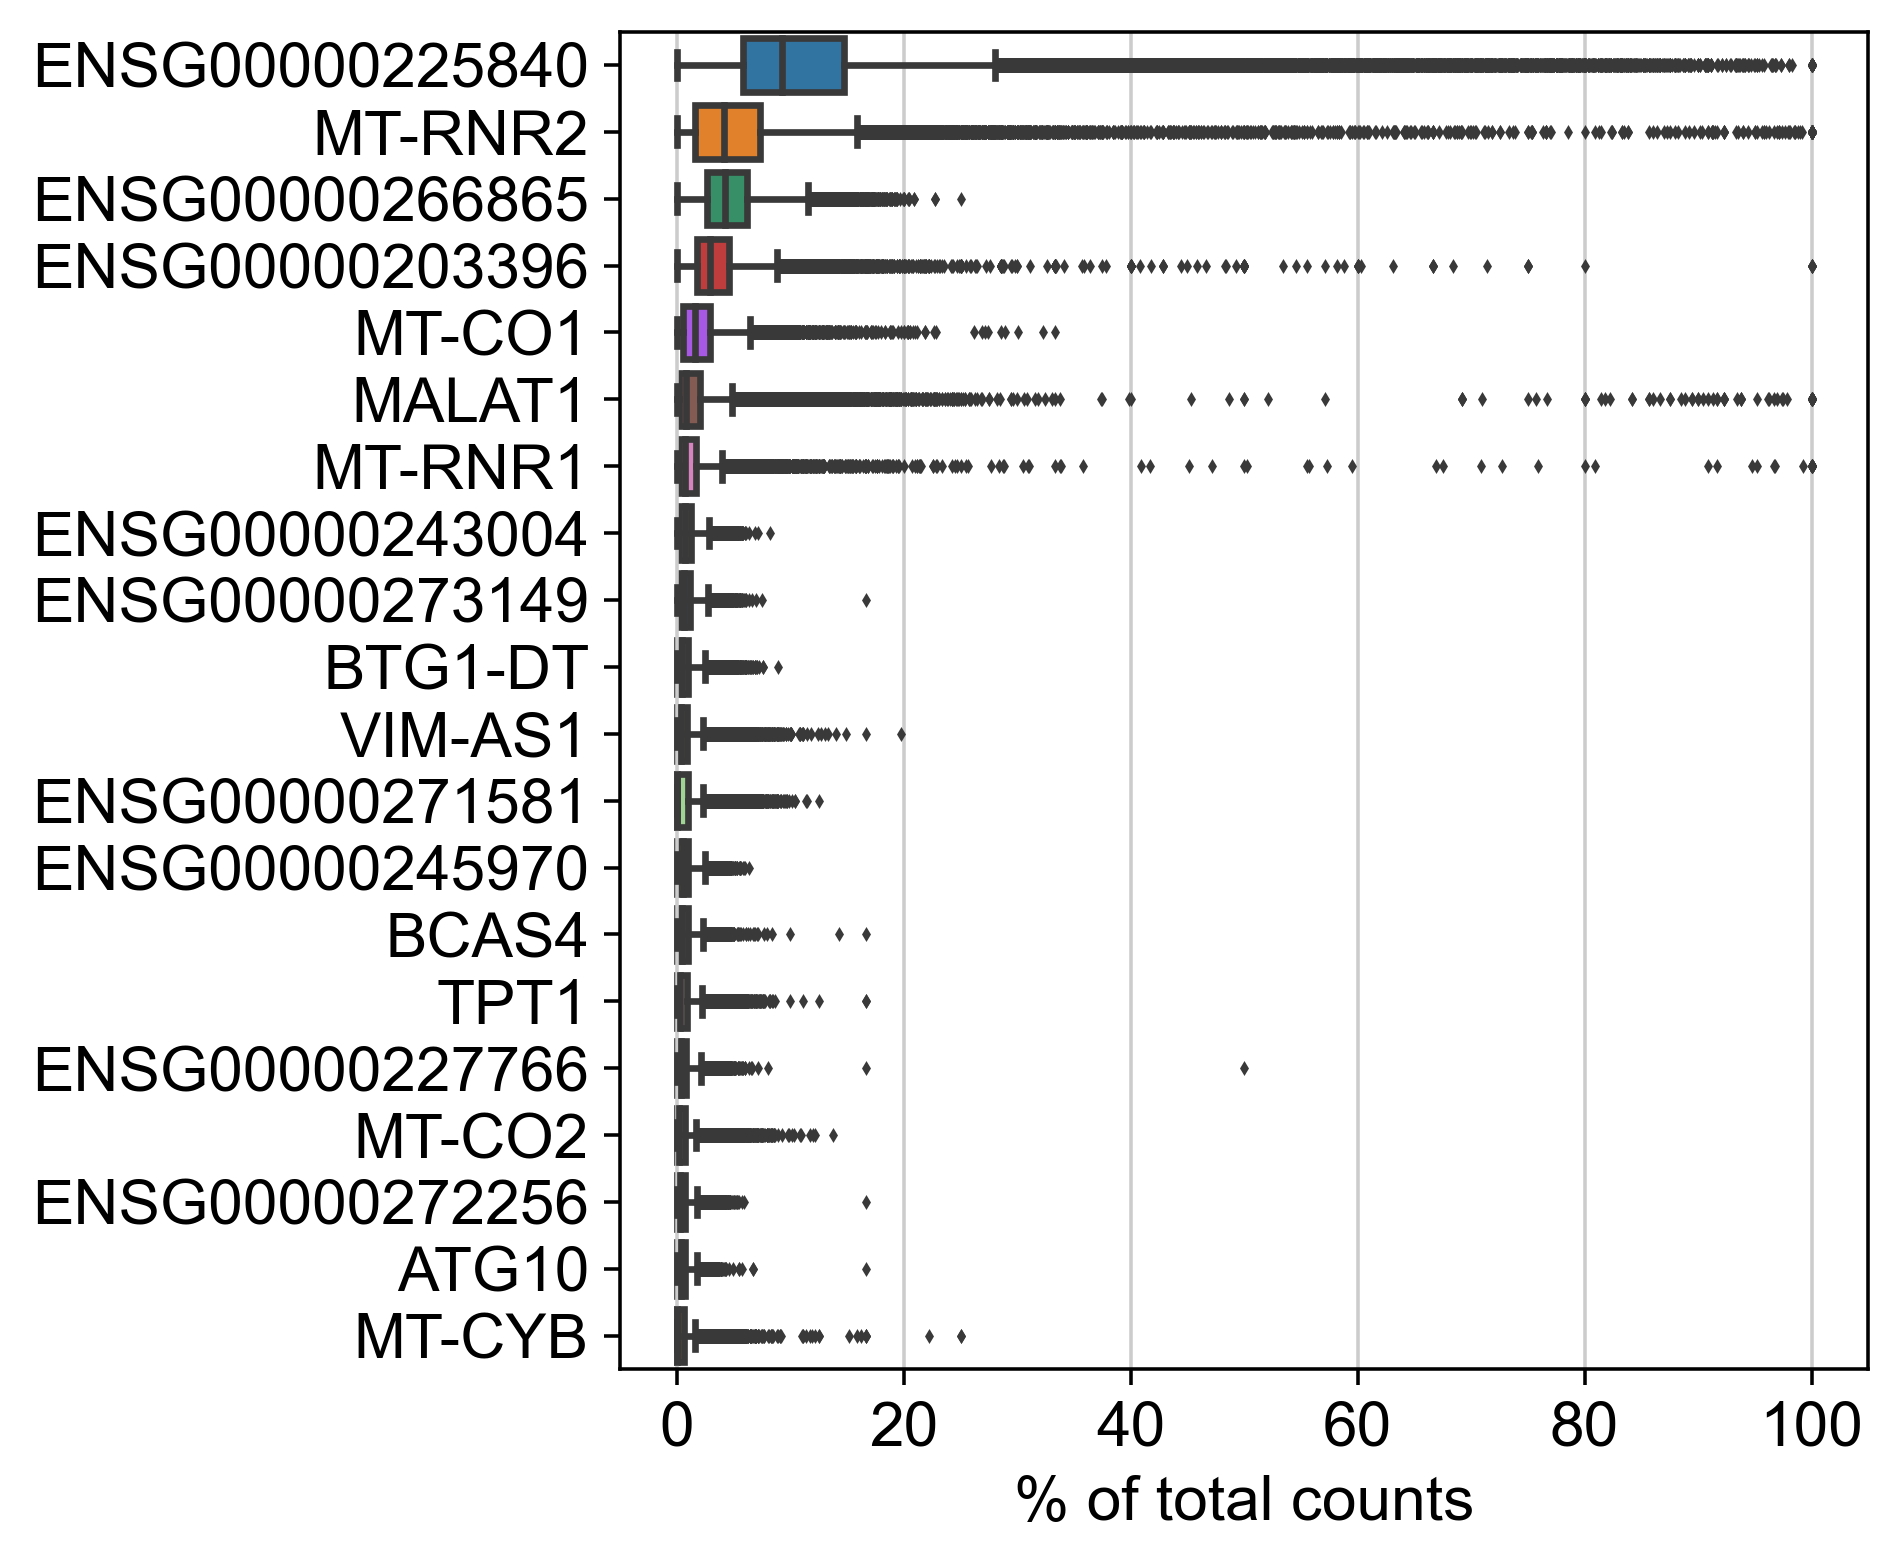

In [16]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Initial filtering

- By gene

In [17]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 52482 cells that have less than 200 genes expressed
25417 61533


In [18]:
sample_object.shape

(25417, 61533)

In [19]:
sample_object.var

gene_id
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1
...                        ...
MT-ND6       ENSG00000198695.2
MT-TE        ENSG00000210194.1
MT-CYB       ENSG00000198727.2
MT-TT        ENSG00000210195.2
MT-TP        ENSG00000210196.2

[61533 rows x 1 columns]

- By cell

In [20]:
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 30378 genes that are detected in less than 3 cells


(25417, 31155)

### QC metrics

In [21]:
sample_object.shape

(25417, 31155)

In [22]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^HB[^(P)]"))
sample_object.var

gene_id  n_cells     mt   ribo     hb
DDX11L1          ENSG00000223972.5        3  False  False  False
WASH7P           ENSG00000227232.5       12  False  False  False
OR4G11P          ENSG00000240361.2        4  False  False  False
OR4F5            ENSG00000186092.7        6  False  False  False
ENSG00000238009  ENSG00000238009.6       23  False  False  False
...                            ...      ...    ...    ...    ...
MT-ND6           ENSG00000198695.2    12880   True  False  False
MT-TE            ENSG00000210194.1      314   True  False  False
MT-CYB           ENSG00000198727.2    17395   True  False  False
MT-TT            ENSG00000210195.2       33   True  False  False
MT-TP            ENSG00000210196.2     1820   True  False  False

[31155 rows x 5 columns]

- Check values present in new columns

In [23]:
sample_object.var['mt'].value_counts()

mt
False    31119
True        36
Name: count, dtype: int64

In [24]:
sample_object.var['ribo'].value_counts()

ribo
False    30758
True       397
Name: count, dtype: int64

In [25]:
sample_object.var['hb'].value_counts()

hb
False    31148
True         7
Name: count, dtype: int64

In [26]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [27]:
sample_object

AnnData object with n_obs × n_vars = 25417 × 31155
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### QC visualisation

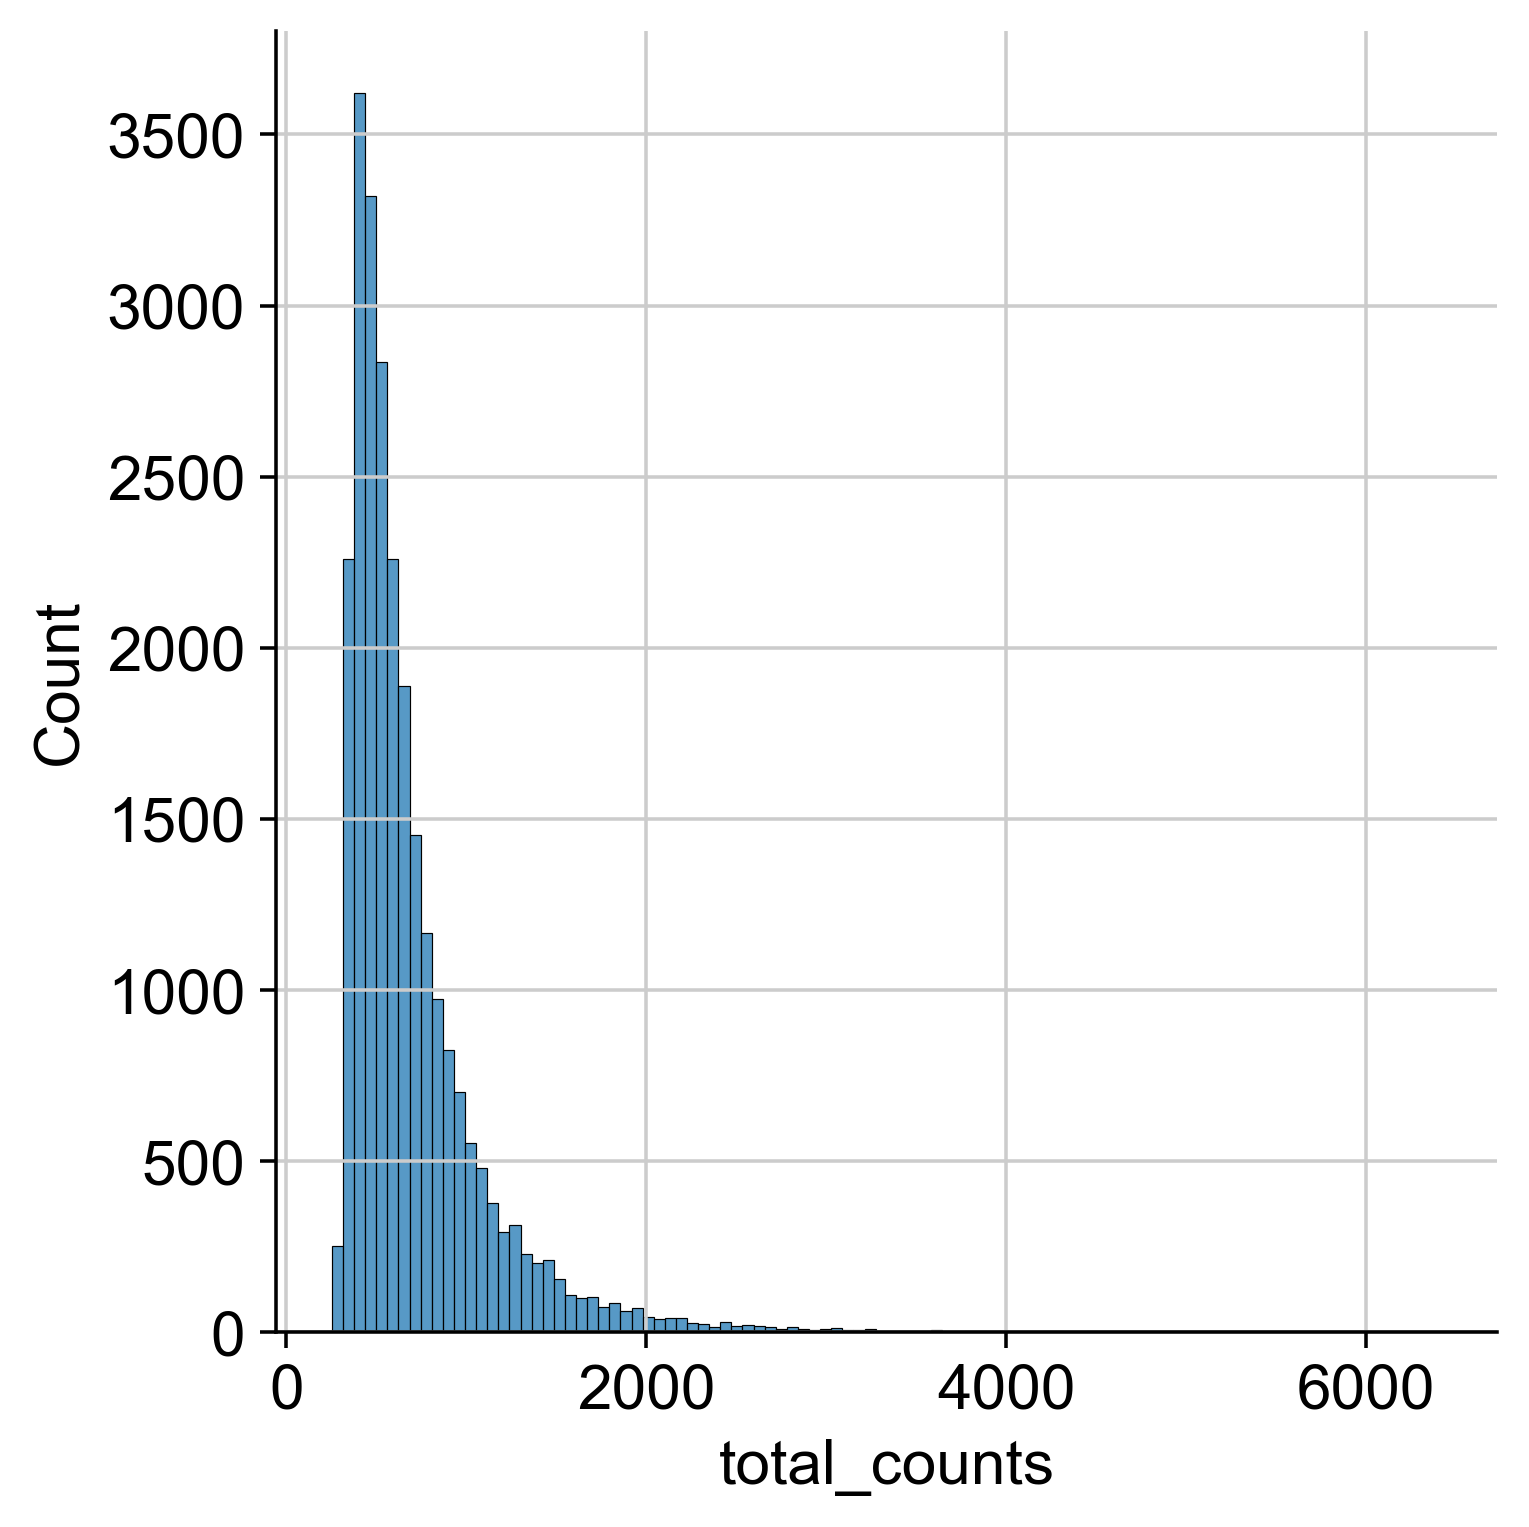

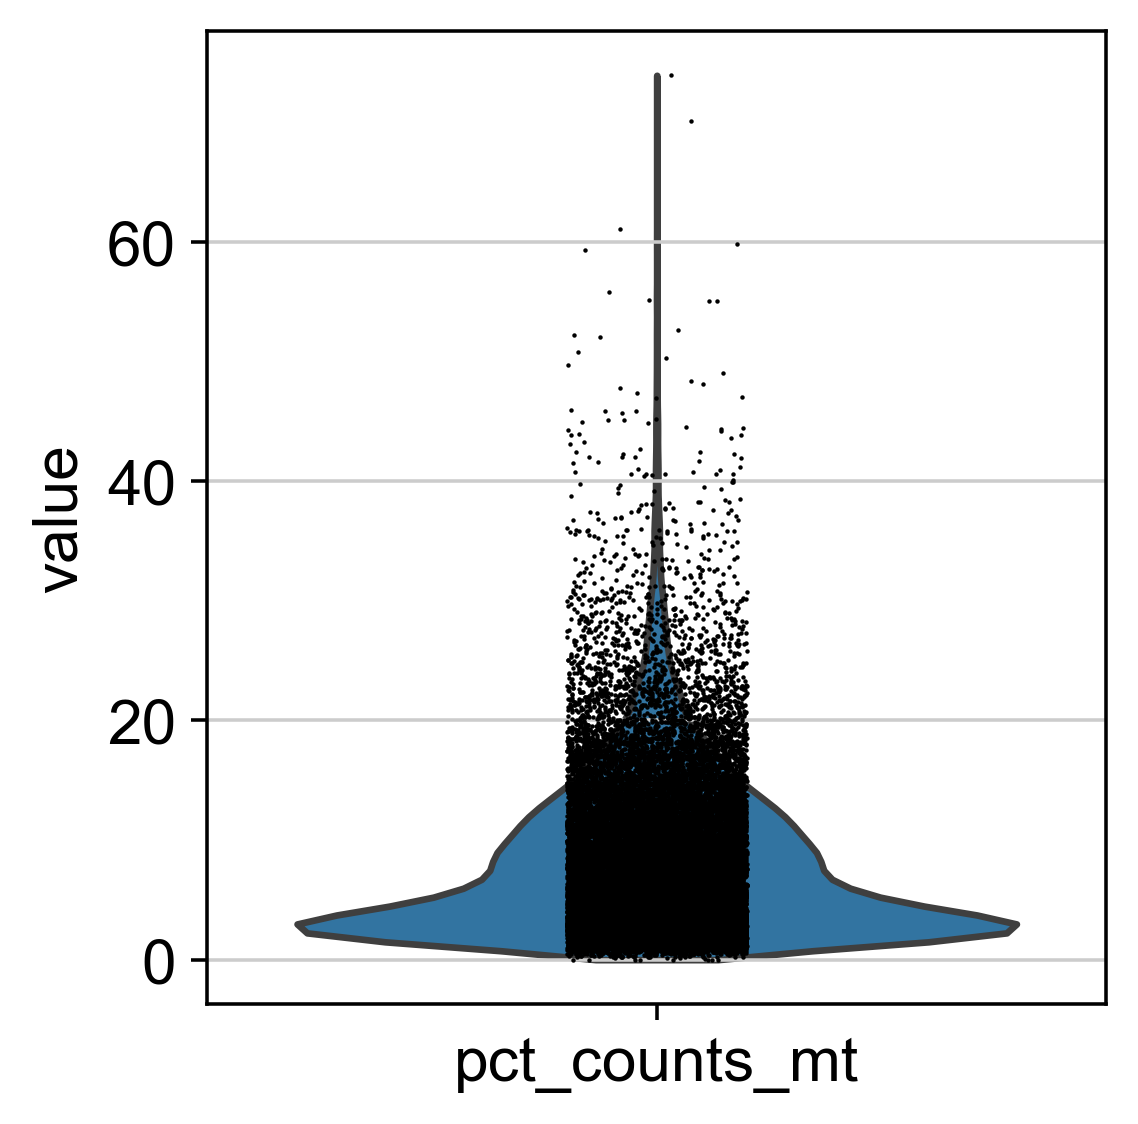

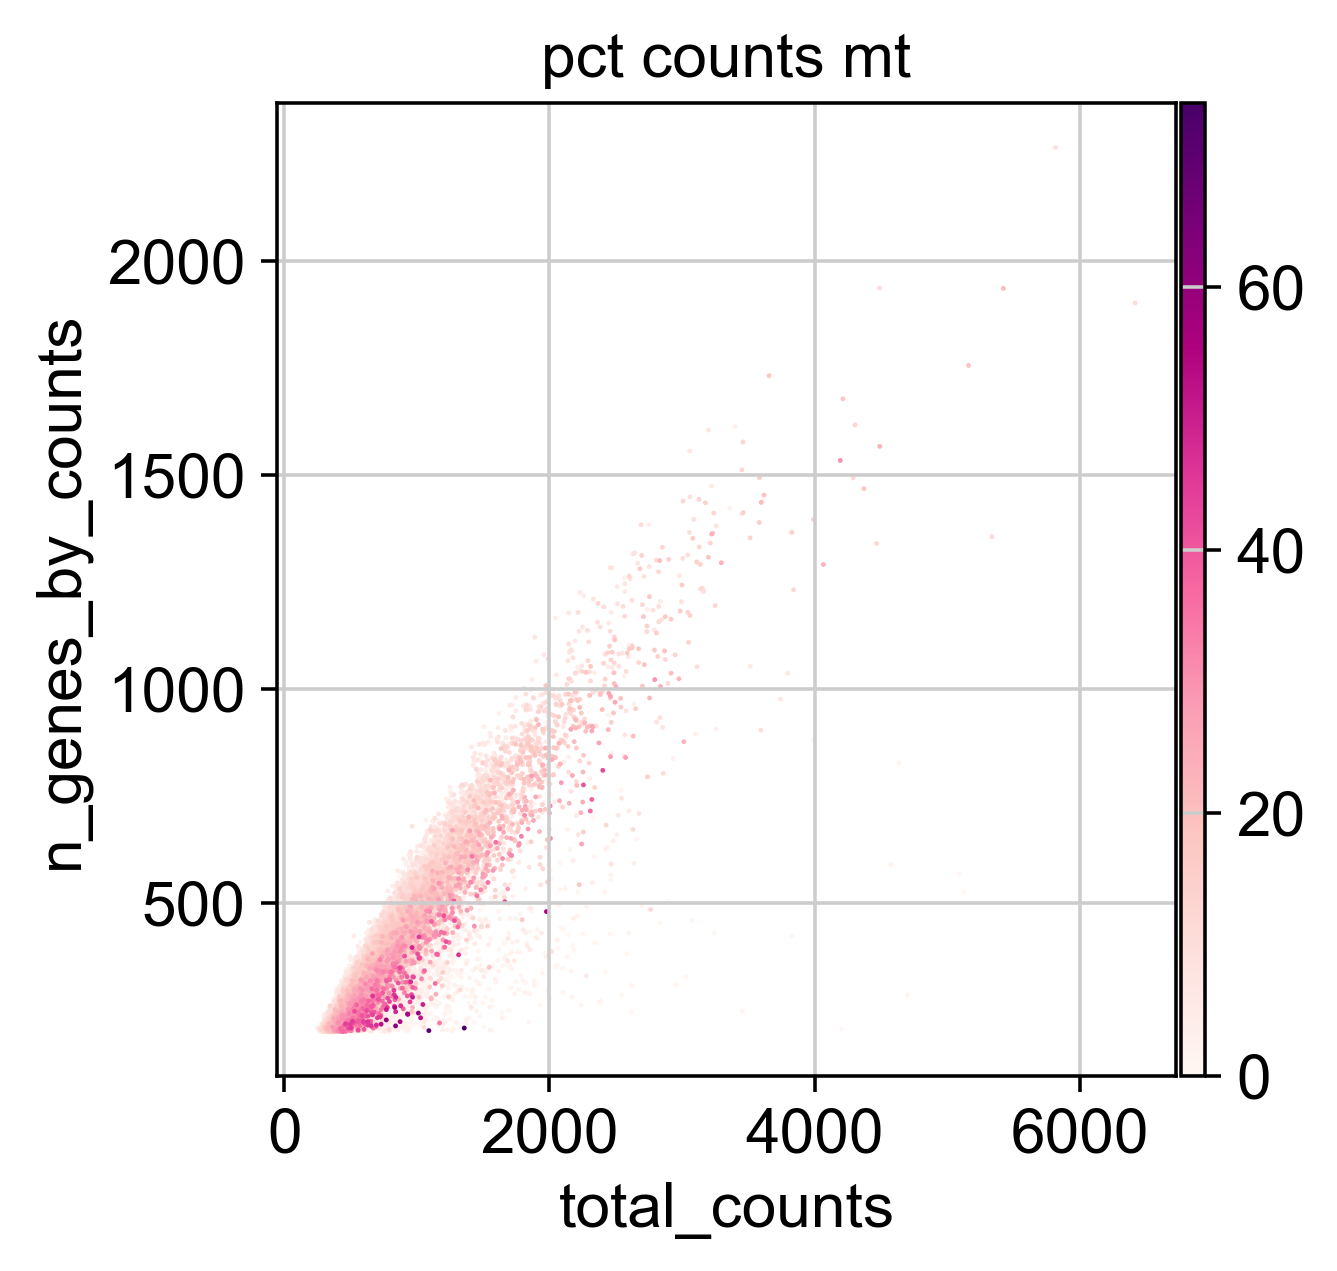

In [28]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

In [29]:
sample_object.var

gene_id  n_cells     mt   ribo     hb  \
DDX11L1          ENSG00000223972.5        3  False  False  False   
WASH7P           ENSG00000227232.5       12  False  False  False   
OR4G11P          ENSG00000240361.2        4  False  False  False   
OR4F5            ENSG00000186092.7        6  False  False  False   
ENSG00000238009  ENSG00000238009.6       23  False  False  False   
...                            ...      ...    ...    ...    ...   
MT-ND6           ENSG00000198695.2    12880   True  False  False   
MT-TE            ENSG00000210194.1      314   True  False  False   
MT-CYB           ENSG00000198727.2    17395   True  False  False   
MT-TT            ENSG00000210195.2       33   True  False  False   
MT-TP            ENSG00000210196.2     1820   True  False  False   

                 n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
DDX11L1                          3     0.000157              99.988197   
WASH7P                          12     0.000472              99.952788   
OR4G11P                          4     0.000197              99.984263   
OR4F5                            6     0.000236              99.976394   
ENSG00000238009                 23     0.000944              99.909509   
...                            ...          ...                    ...   
MT-ND6                       12880     0.930991              49.325255   
MT-TE                          314     0.013141              98.764606   
MT-CYB                       17395     2.982177              31.561553   
MT-TT                           33     0.001298              99.870166   
MT-TP                         1820     0.078097              92.839438   

                 total_counts  
DDX11L1                   4.0  
WASH7P                   12.0  
OR4G11P                   5.0  
OR4F5                     6.0  
ENSG00000238009          24.0  
...                       ...  
MT-ND6                23663.0  
MT-TE                   334.0  
MT-CYB                75798.0  
MT-TT                    33.0  
MT-TP                  1985.0  

[31155 rows x 9 columns]

In [30]:
sample_object.obs

study individual     sample  \
barcode                                                                     
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
...                                             ...        ...        ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq  CaiY_2022  HRI068293  HRS100513   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq   PBMC    P4  scRNAseq   

                                                       centre version  \
barcode                                                                 
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq  Shenzhen University   10XV2   

                                             object       protocol  n_genes  \
barcode                                                                       
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq      213   
AAACCTGTCTTTAGTC-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq      206   
AAACGGGAGTTAACGA-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq      201   
AAAGATGAGCAGACTG-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq      237   
AAAGATGAGGACGAAA-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq      255   
...                                             ...            ...      ...   
TTTGTCAGTCCATCCT-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq      426   
TTTGTCAGTGCTGTAT-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq      261   
TTTGTCAGTGTGGCTC-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq      220   
TTTGTCATCGTTTATC-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq      745   
TTTGTCATCTTACCTA-HRS100513-pbmc_scRNAseq  HRS100513  pbmc_scRNAseq      202   

                                          n_genes_by_counts  total_counts  \
barcode                                                                     
AAACCTGGTATAGGGC-HRS180101-pbmc_scRNAseq

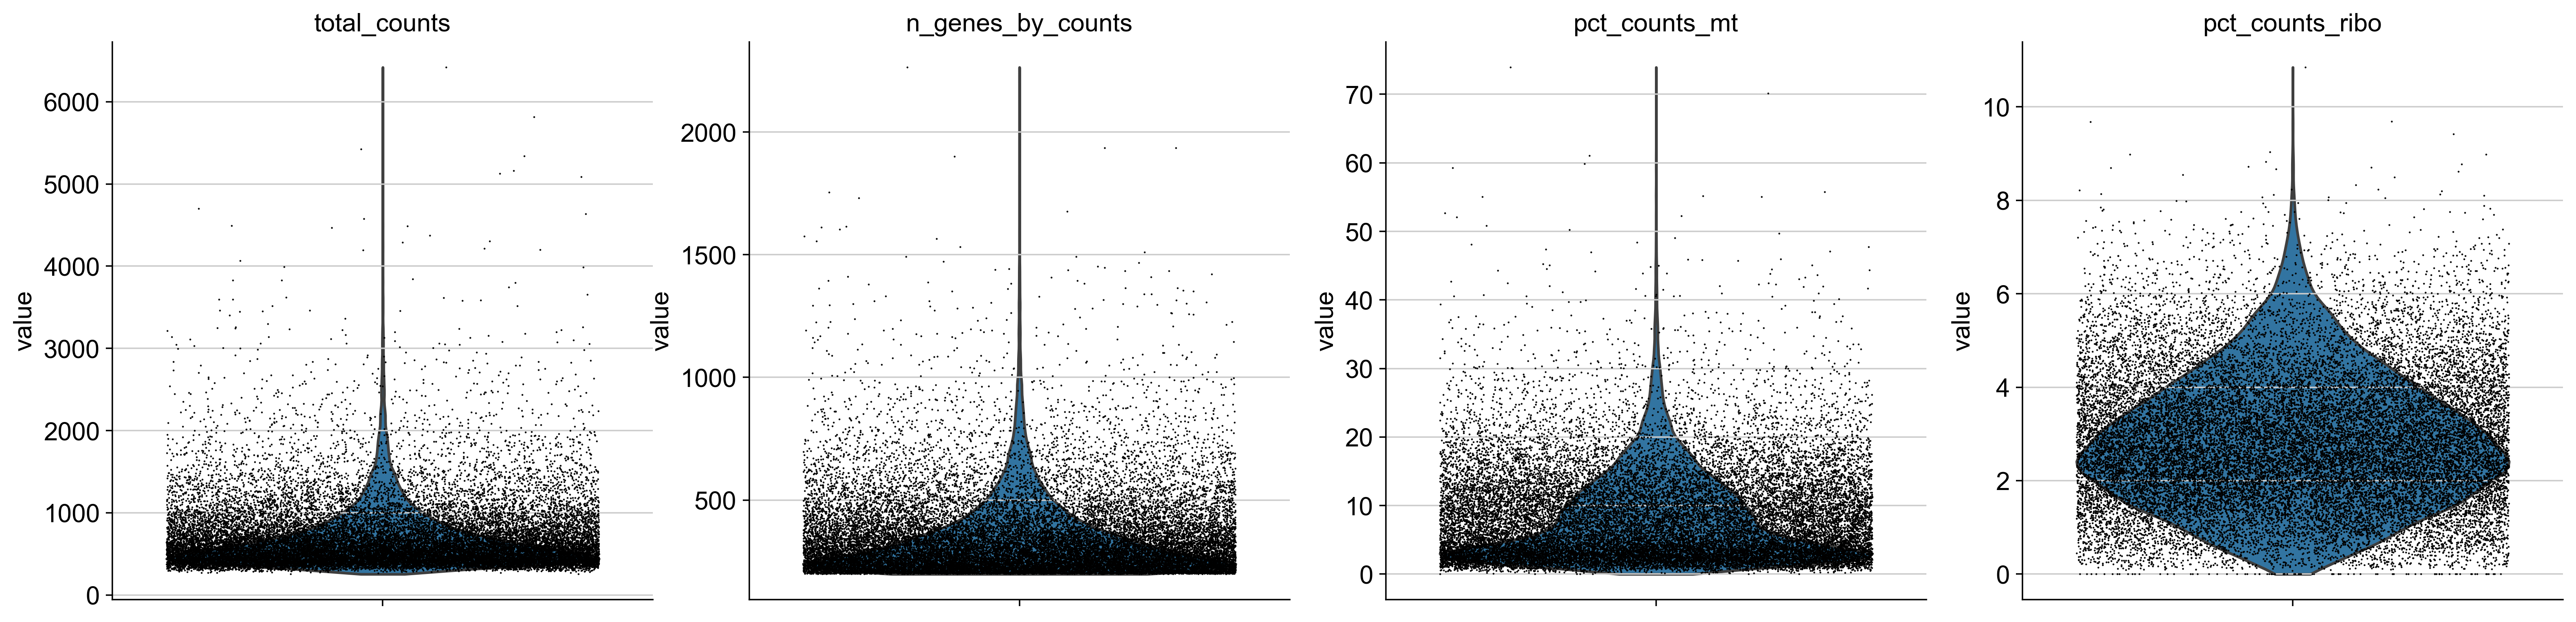

In [31]:
sc.pl.violin(sample_object, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

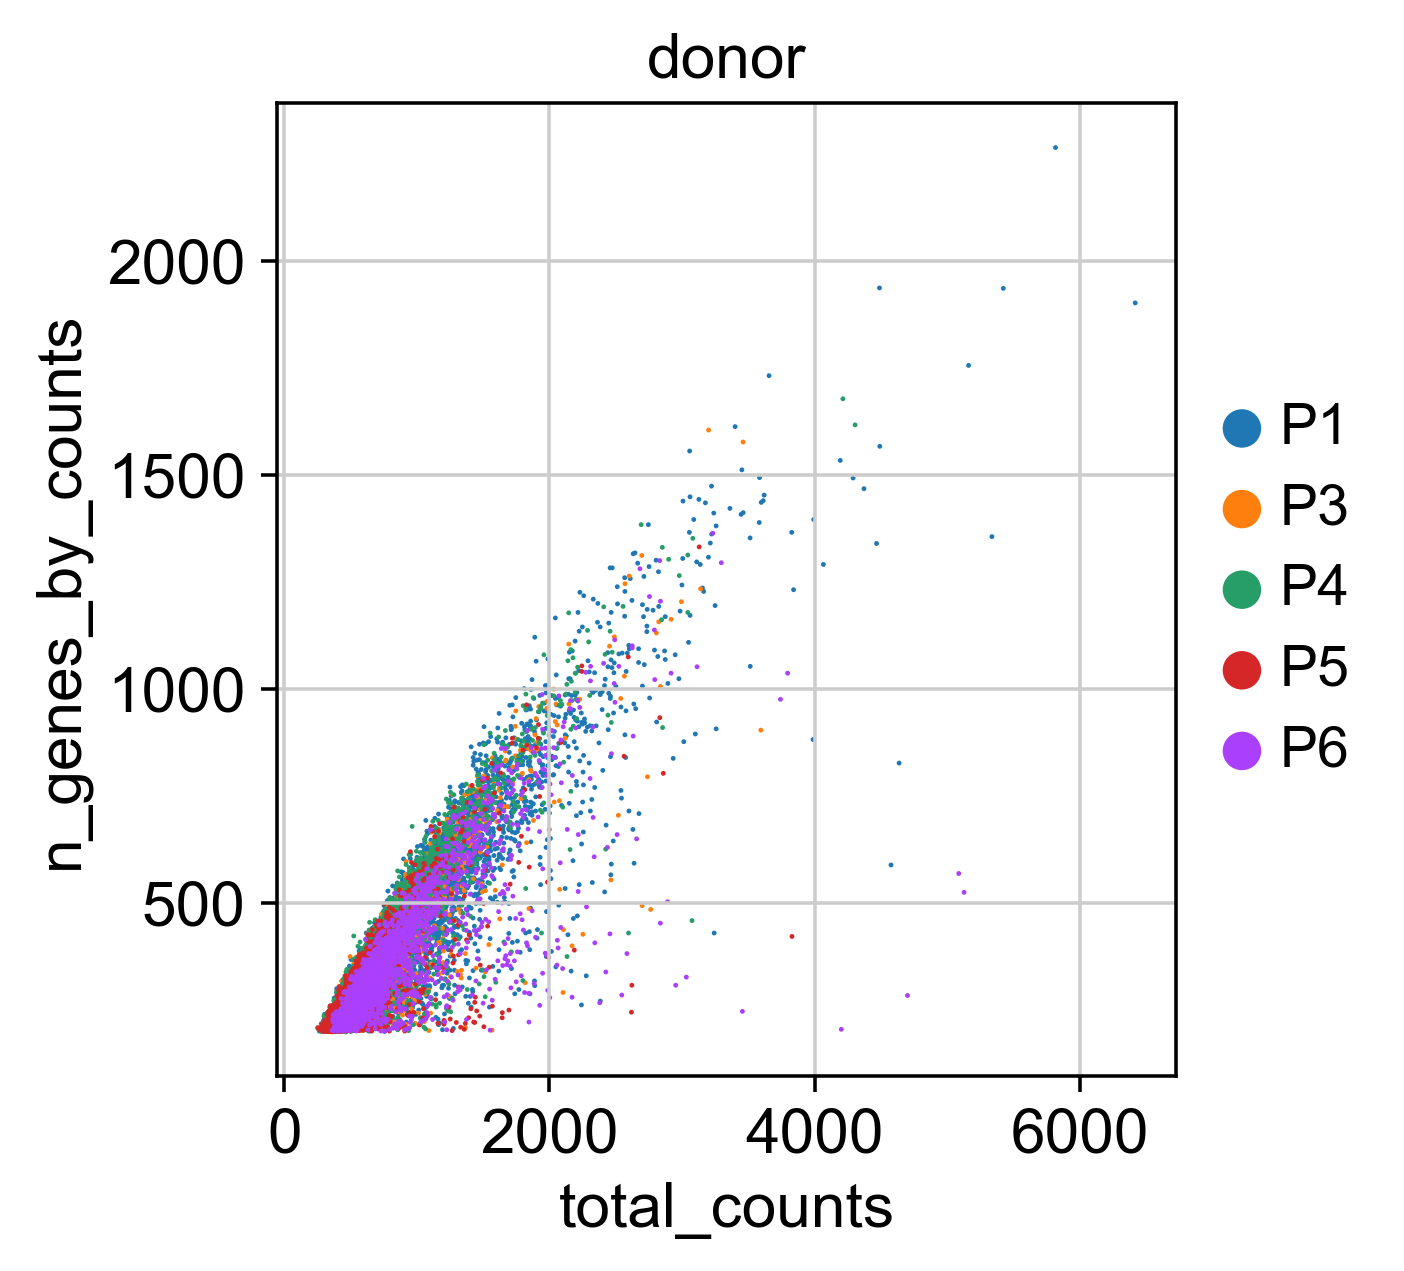

In [32]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "donor")

### Add sample sex covariate

In [33]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [34]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

- Y chrom

In [35]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['XGY2', 'RPS4Y1', 'HSFY3P', 'ZFY', 'LINC00278', 'PCDH11Y', 'FAM197Y9',
       'PRKY', 'RN7SKP282', 'RFTN1P1', 'ZNF736P9Y', 'LINC00279', 'USP9YP4',
       'FAM197Y7', 'RBMY2QP', 'GYG2P1', 'USP9Y', 'CDY4P', 'DDX3Y', 'DPPA2P1',
       'UTY', 'TMSB4Y', 'ANOS2P', 'NLGN4Y', 'NLGN4Y-AS1', 'TTTY14', 'BCORP1',
       'TXLNGY', 'KDM5D', 'TTTY10', 'EIF1AY', 'PRORY', 'USP9YP3', 'RBMY2FP'],
      dtype='object')

In [36]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

- X chrom

In [37]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['Metazoa_SRP', 'GYG2', 'ARSD', 'ARSD-AS1', 'ARSL', 'ARSF', 'RN7SL578P',
       'LINC01546', 'PRKX', 'PRKX-AS1',
       ...
       'CMC4', 'MTCP1', 'BRCC3', 'VBP1', 'RAB39B', 'CLIC2', 'TWF1P2',
       'TMLHE-AS1', 'TMLHE', 'SPRY3'],
      dtype='object', length=712)

In [39]:
sample_object.obs['percent_chrX'] = np.sum(
    sample_object[:, chrX_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

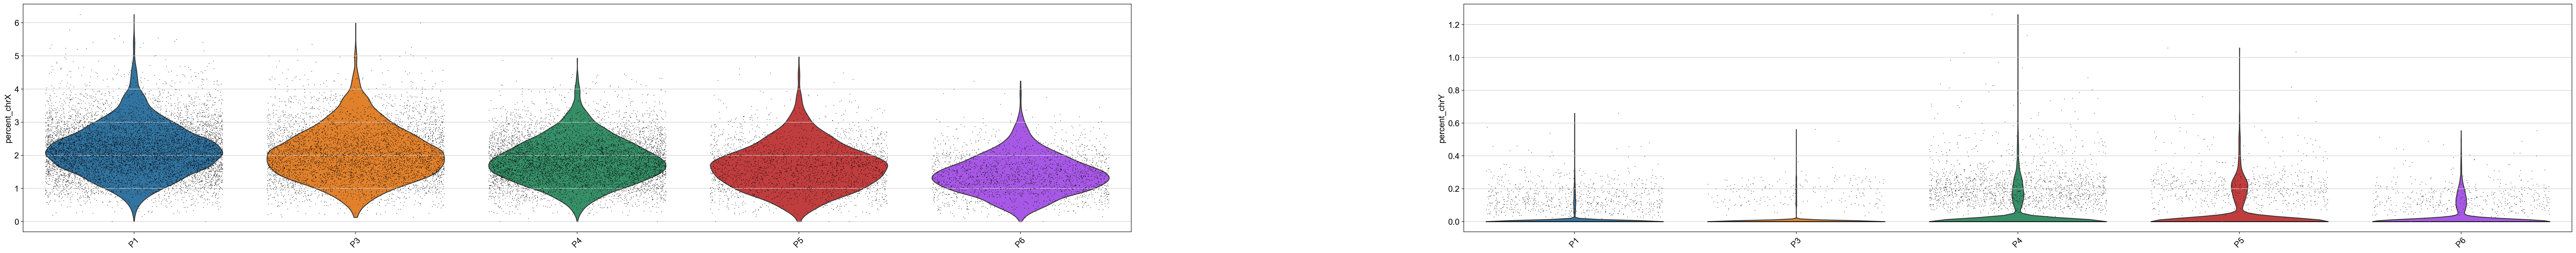

In [40]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(sample_object, ["percent_chrX", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Calculate cell cycle scores

In [41]:
!if [ ! -f /Users/mairi.mcclean/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/cell_cycle_gene.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [42]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
94


- Create basic `anndata` for score calculation

In [43]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['ENSG00000288934', 'IGKV4-1', 'IGKV3-11', 'IGKV3-15', 'IGKV3-20', 'ENSG00000286848', 'ENSG00000248223', 'CD74', 'ENSG00000230521', 'ENSG00000227766', 'ENSG00000271581', 'ACTB', 'ENSG00000243004', 'ENSG00000203396', 'VIM-AS1', 'HBB', 'BEST1', 'MALAT1', 'ENSG00000257764', 'BTG1-DT', 'TPT1', 'ENSG00000273149', 'IGHG2', 'IGHA1', 'IGHG1', 'IGHG3', 'IGHM', 'ENO3', 'ENSG00000266865', 'JSRP1', 'ENSG00000267598', 'ENSG00000283907', 'BCAS4', 'PRAMENP', 'IGLV3-25', 'IGLV3-19', 'ENSG00000225840', 'MT-RNR1', 'MT-RNR2', 'MT-CO1', 'MT-CO2', 'MT-CYB']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    730 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    945 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


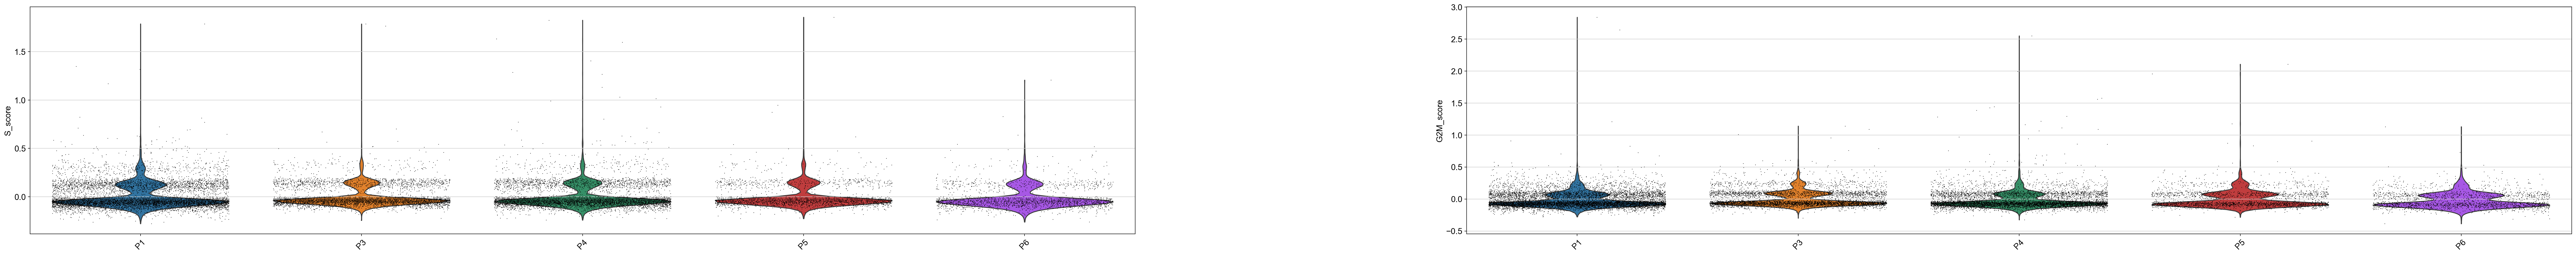

In [44]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [45]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 25417 × 31155
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors'

### Predict doublets

In [46]:
import scrublet

In [47]:
scrub = scrublet.Scrublet(sample_object.X)

Preprocessing...


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:241: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:254: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 1.0%
Estimated detectable doublet fraction = 14.6%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 6.8%
Elapsed time: 27.2 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

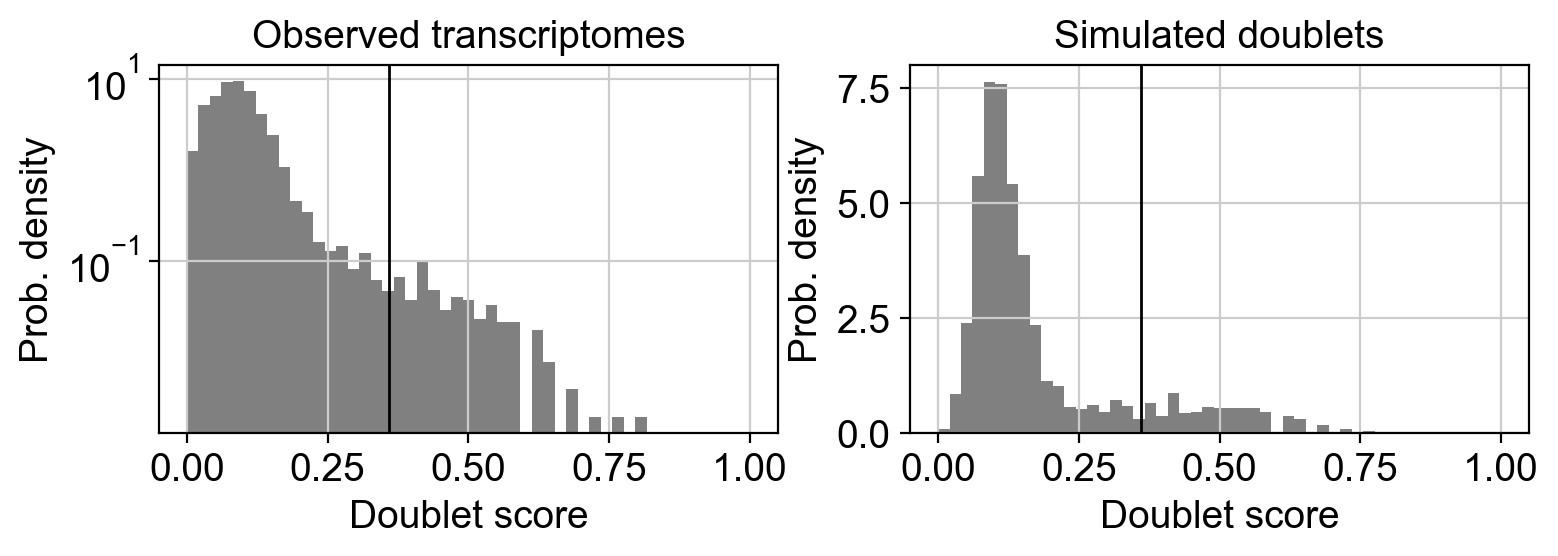

In [48]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [49]:
sum(sample_object.obs['predicted_doublets'])

253

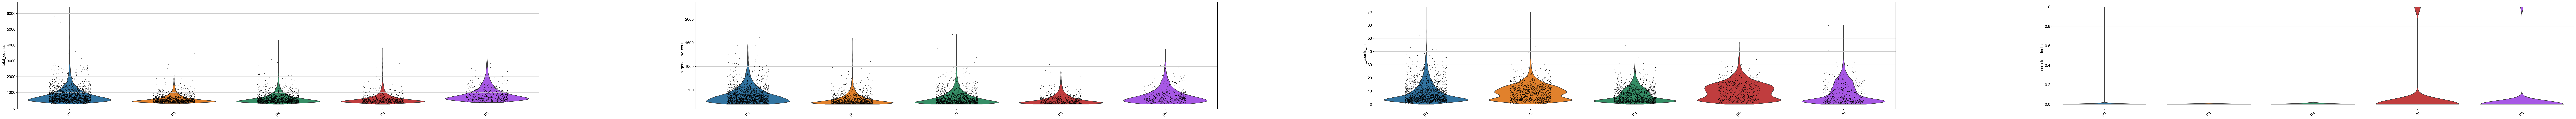

In [50]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

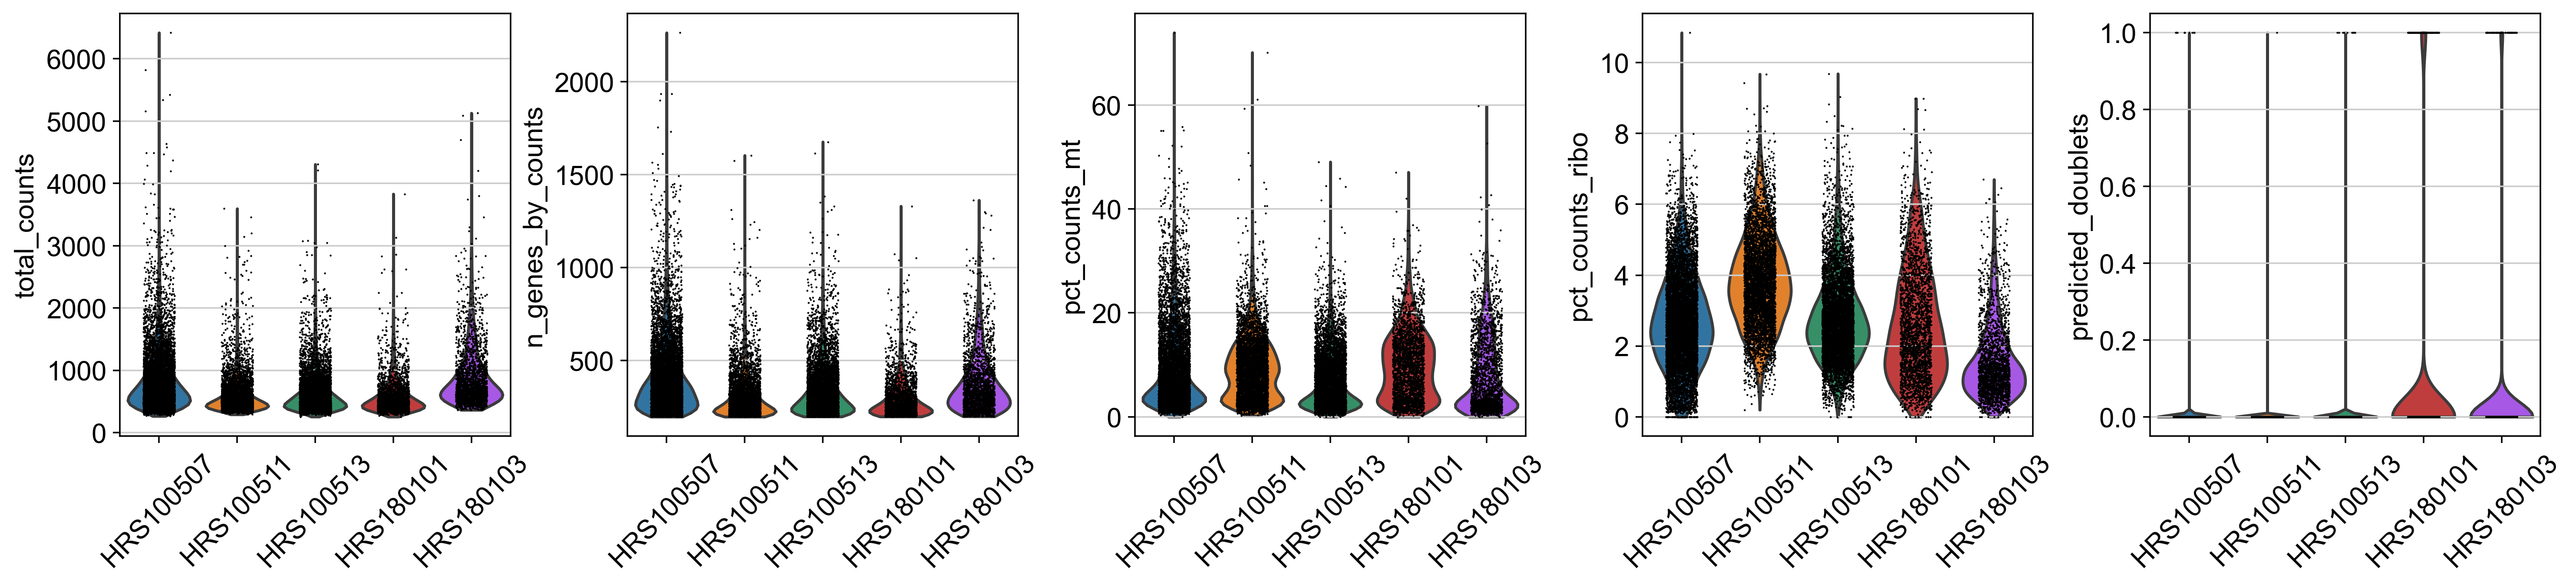

In [52]:
sc.pl.violin(sample_object, ['total_counts', 'n_genes_by_counts', 'pct_counts_mt', 'pct_counts_ribo', 'predicted_doublets'],
             jitter = 0.2, groupby = 'sample', rotation = 45)

### Density plots

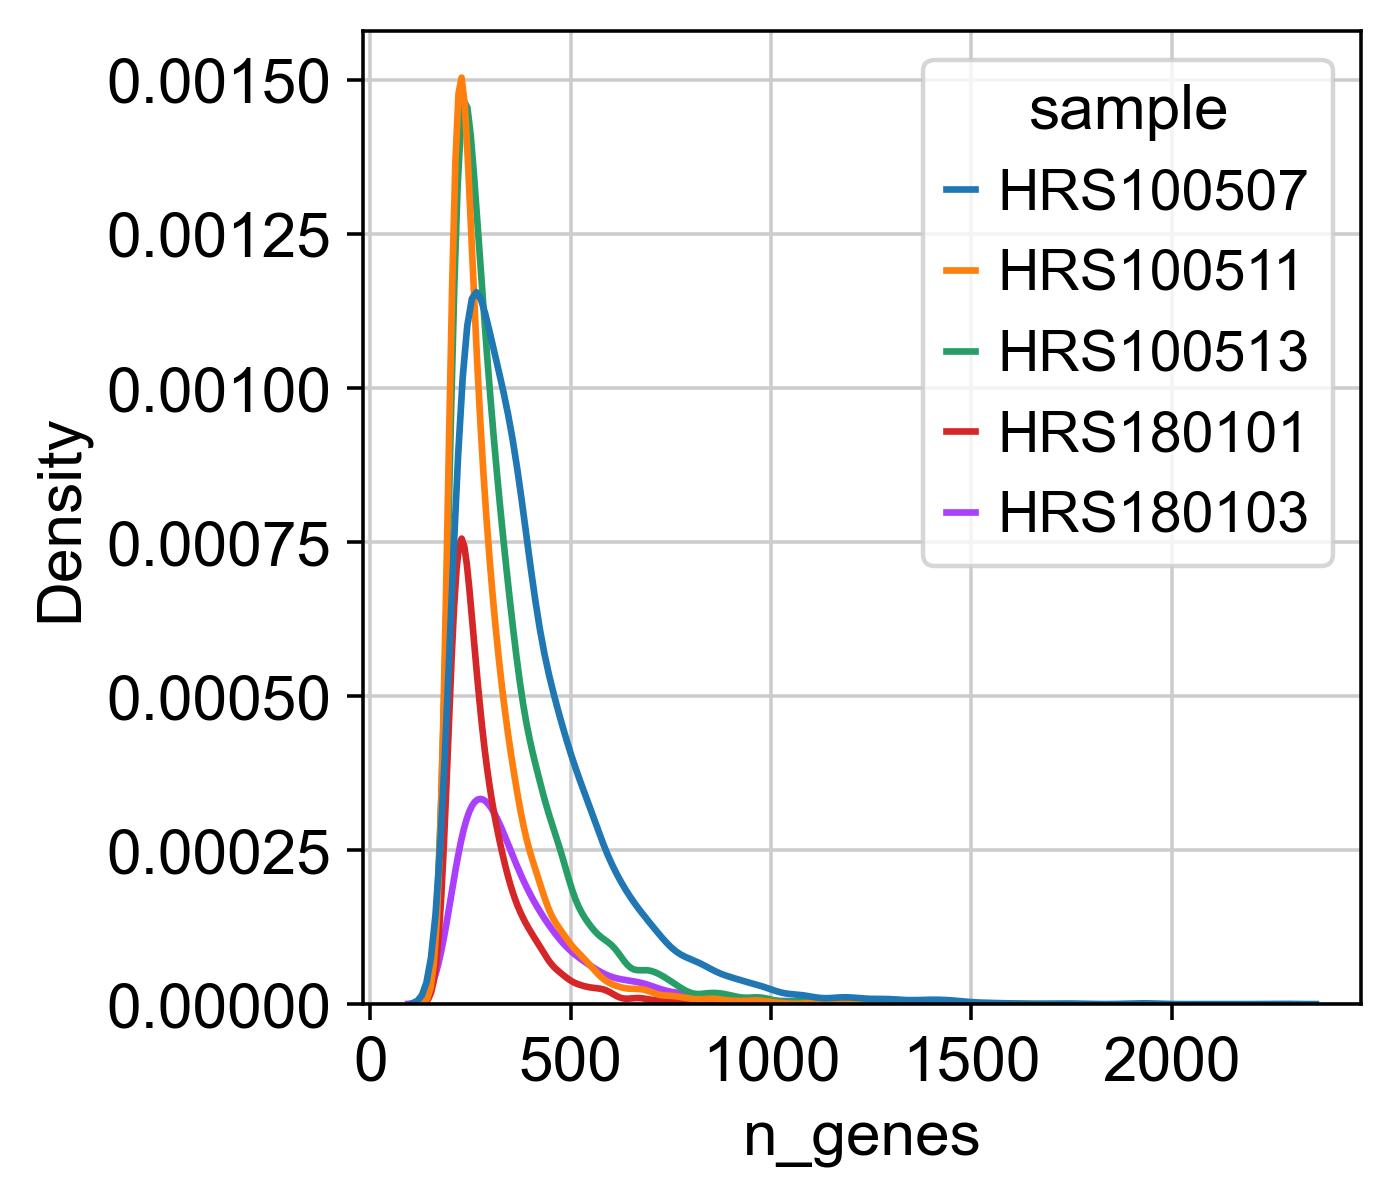

In [53]:
fig = sns.kdeplot(data=sample_object.obs, x=sample_object.obs['n_genes'], hue="sample", log_scale=False)
plt.show()

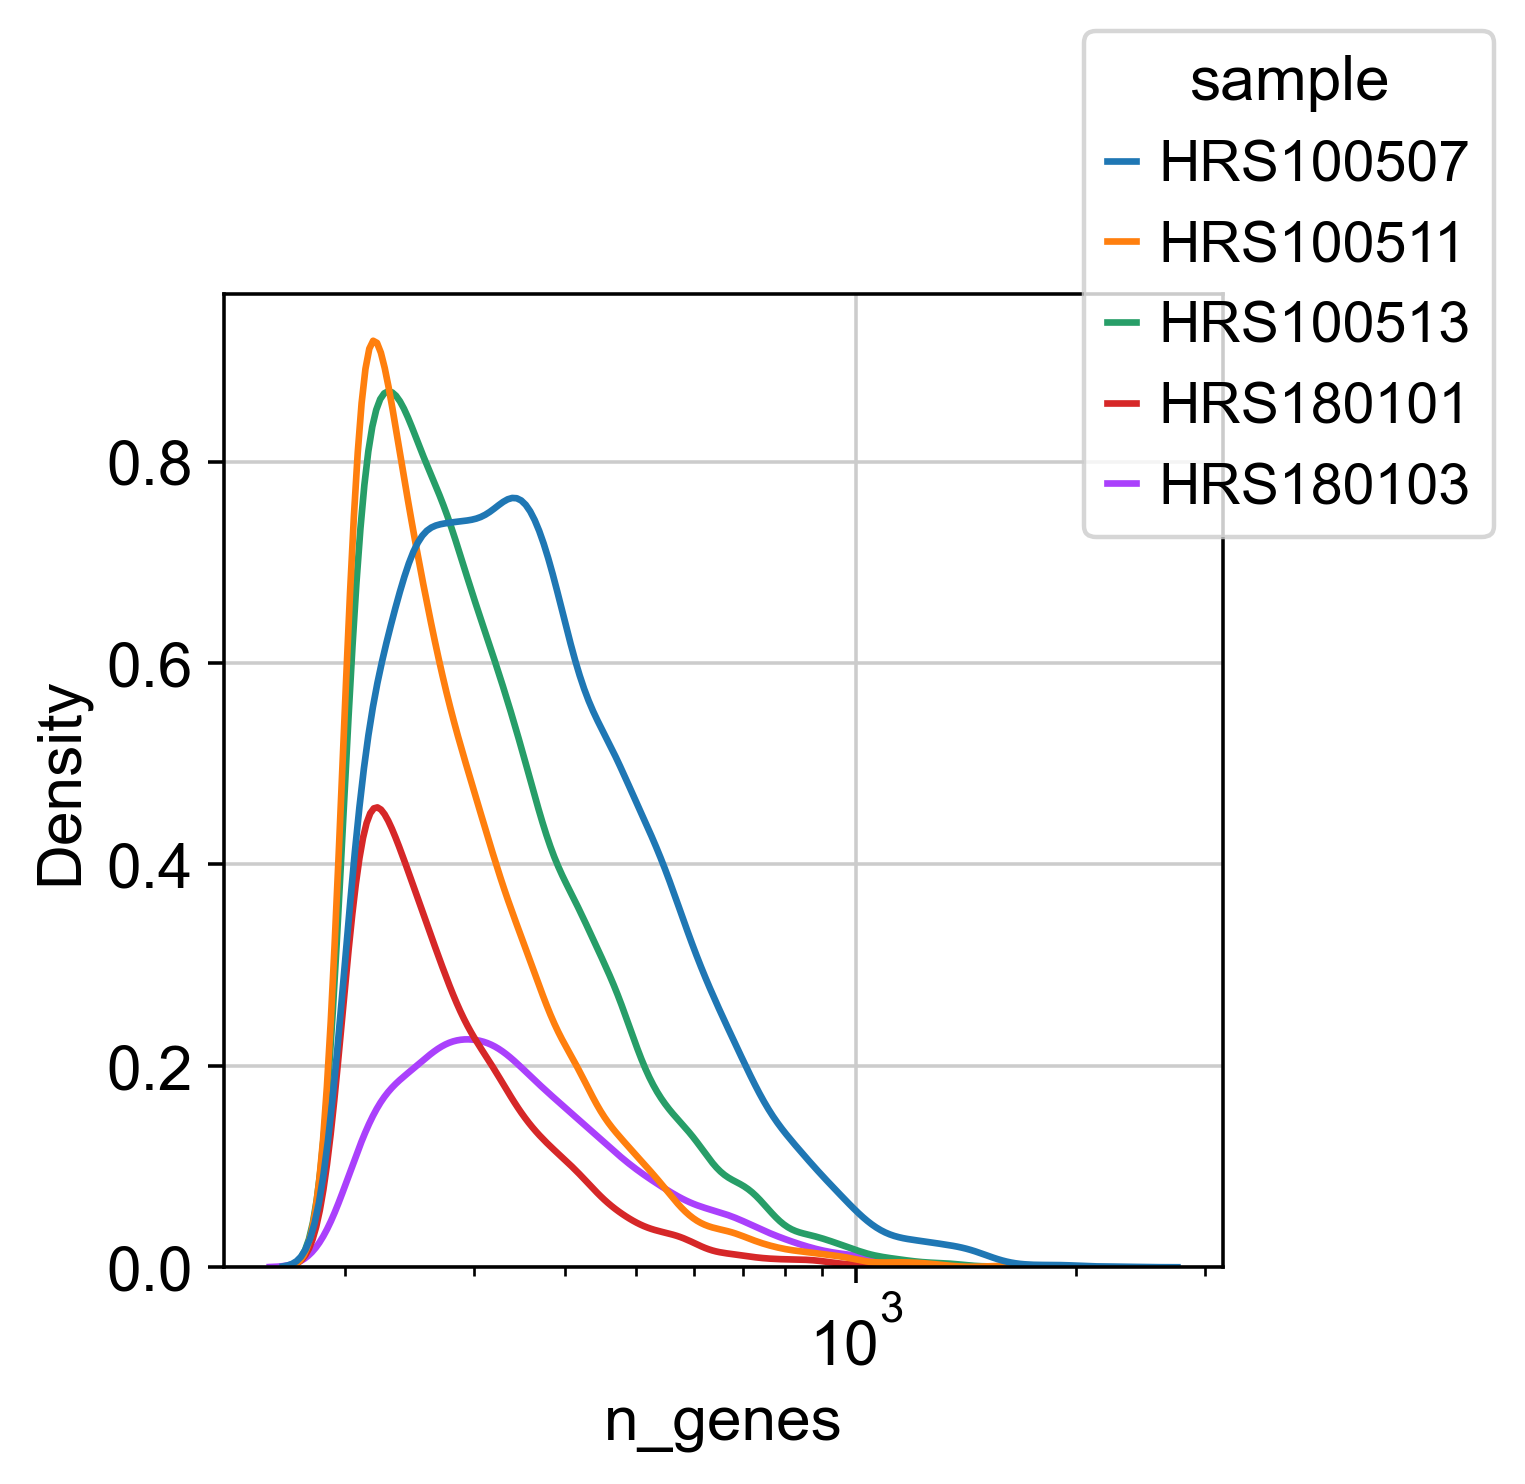

In [54]:
fig_n_genes = sns.kdeplot(data=sample_object.obs, x=sample_object.obs['n_genes'], hue="sample", log_scale=True)
sns.move_legend(fig_n_genes, "upper right", bbox_to_anchor=(1.3, 1.3))
plt.show()

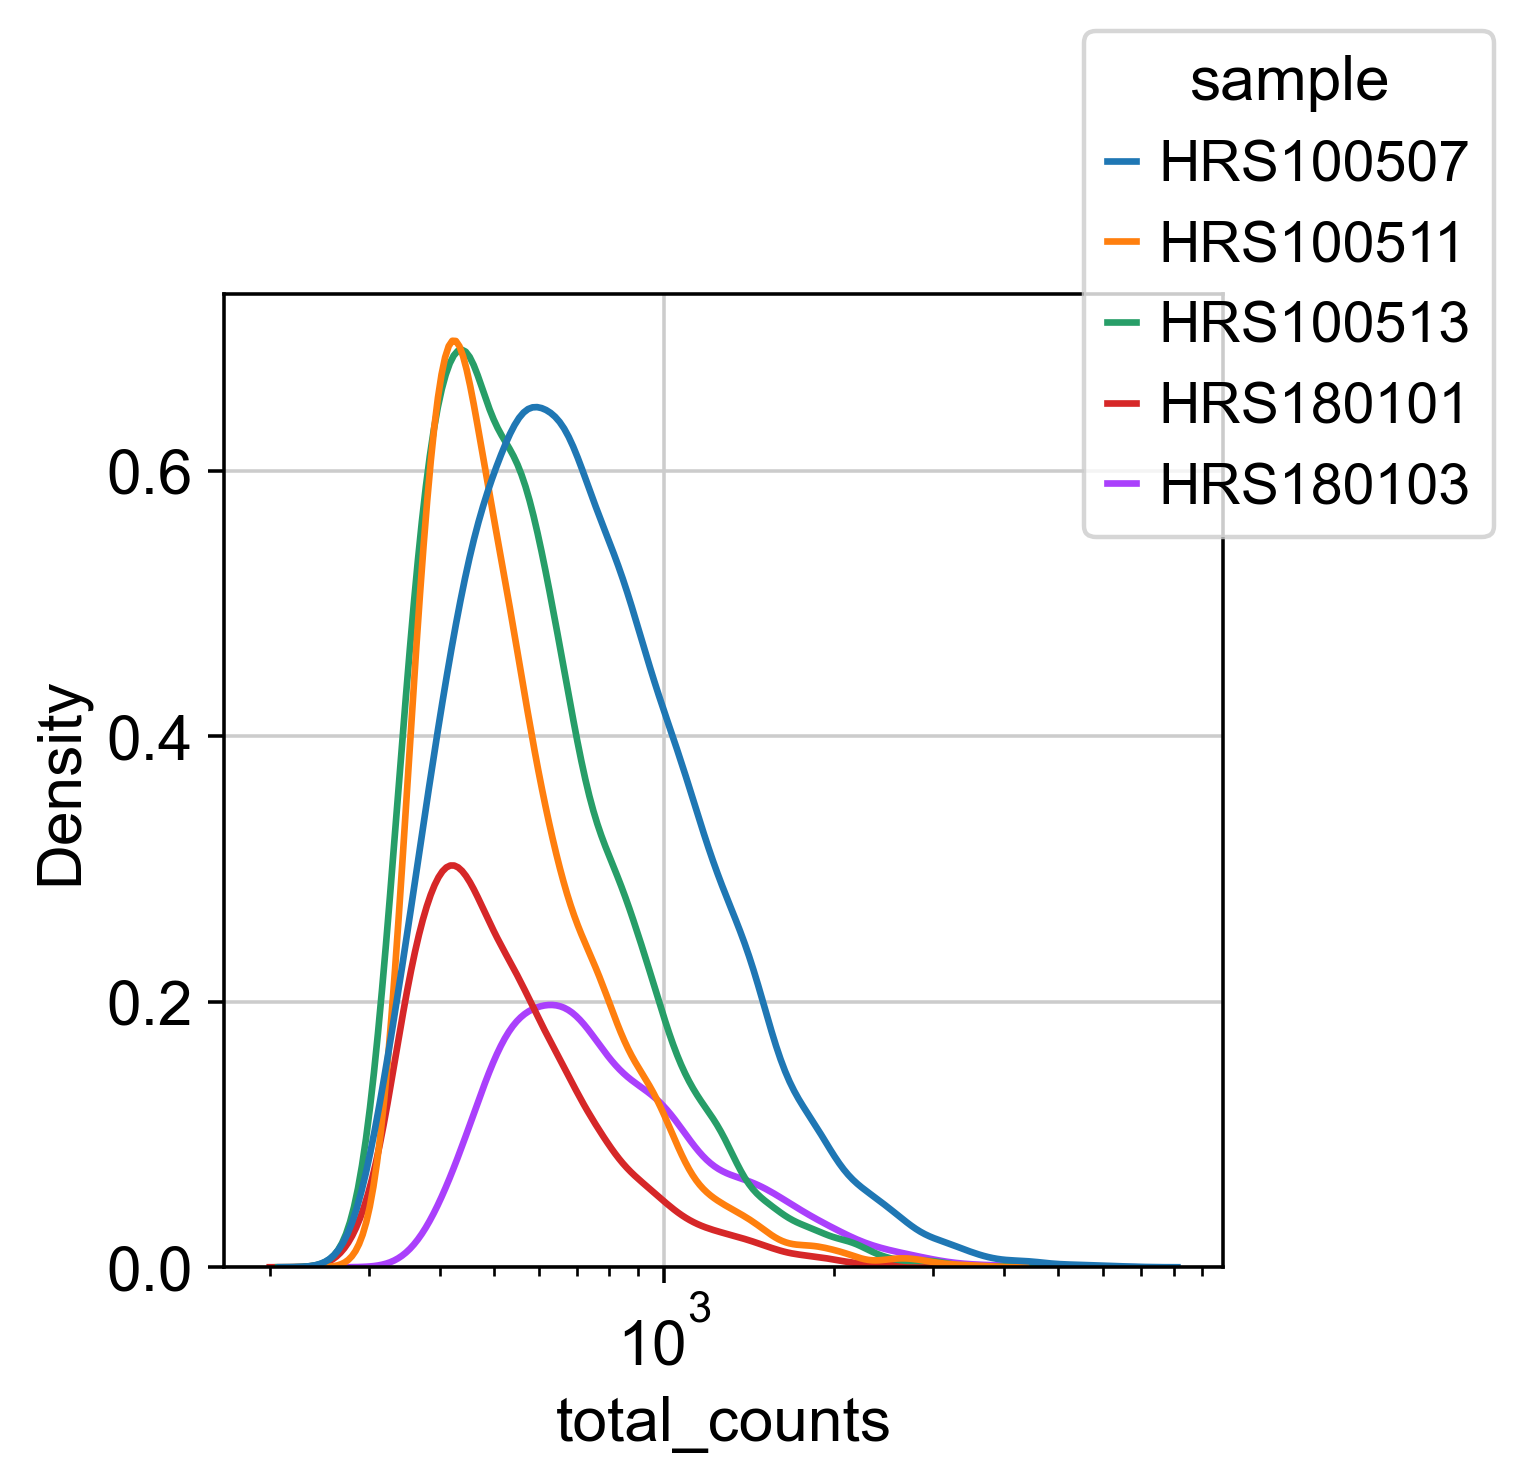

In [55]:
fig_n_counts = sns.kdeplot(data=sample_object.obs, x=sample_object.obs['total_counts'], hue="sample", log_scale=True)
sns.move_legend(fig_n_counts, "upper right", bbox_to_anchor=(1.3, 1.3))
plt.show()

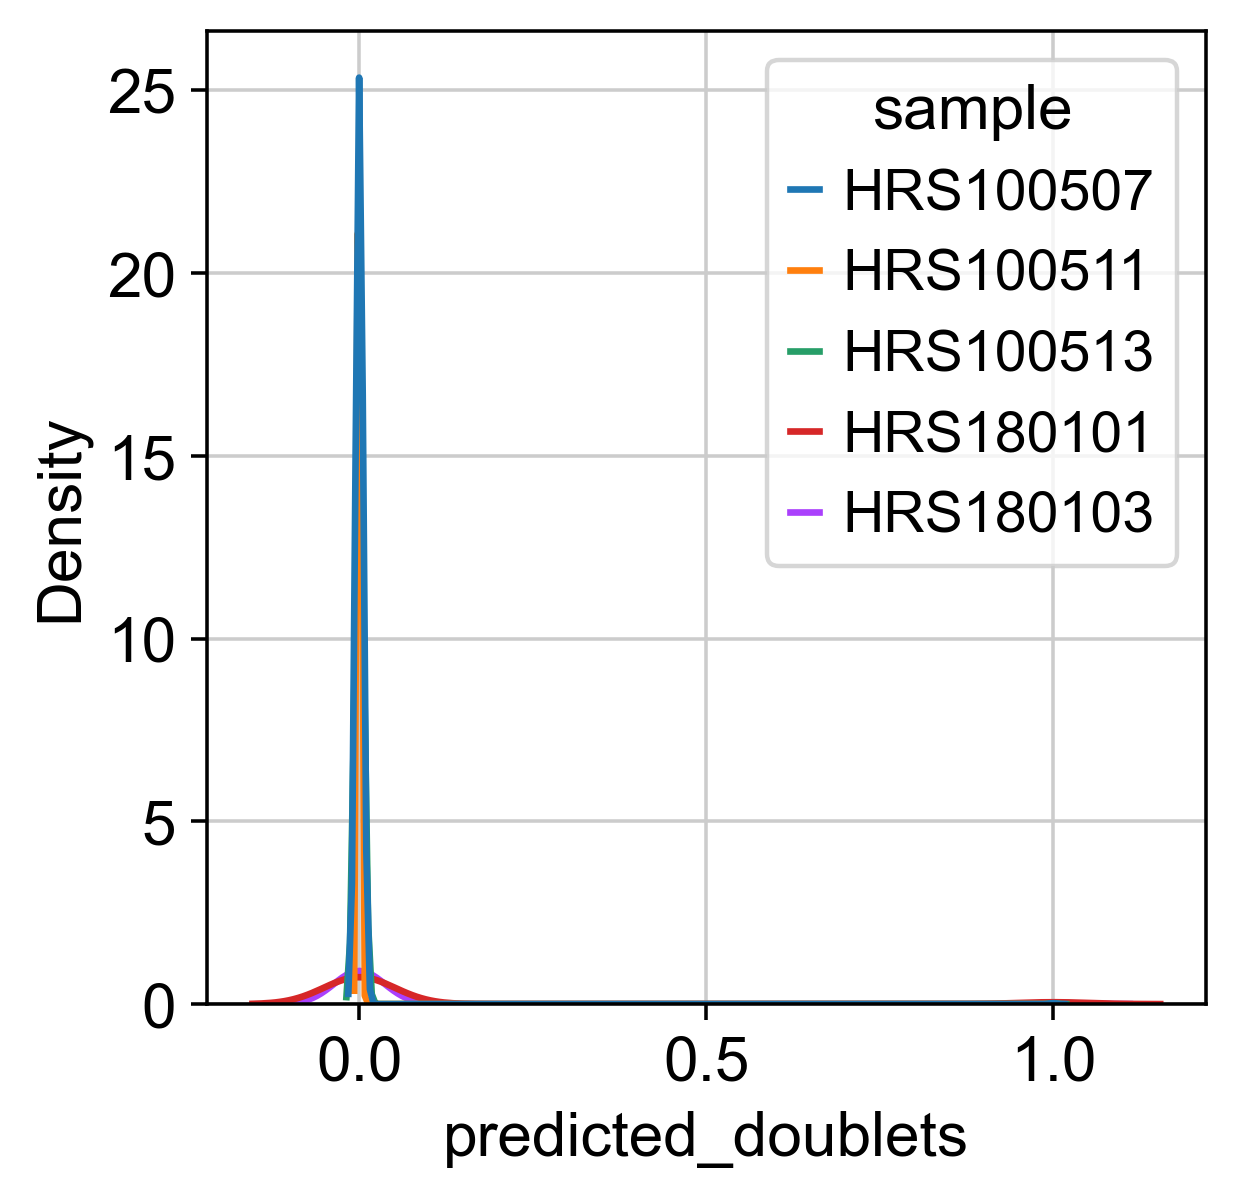

In [56]:
sns.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")
plt.show()

### Prepare counts for individual slots


In [57]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell


    finished (0:00:00)


AnnData object with n_obs × n_vars = 25417 × 31155
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_chrY', 'percent_chrX', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'sample_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [58]:
sample_object.write('/Users/mairi.mcclean/example_data_lake/processed_files/final_qc_mm230627/human/cai_2022/CaiY2022_PBMC_scRNA_mm230627.h5ad')
